In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import random
from collections import Counter

# Monte Carlo Simulation
> $f(x) = arcsch(x) + \frac{1}{2}\sin^2x + \frac{1}{x^2}$

> $arcsch(x) = \ln(\frac{1}{x} + \sqrt{{1 \over x^2} + 1})$

- $arcsch(x)$

<img src="./Graph.PNG" width="400" height="400">

- **$f(x) = arcsch(x) + \frac{1}{2}\sin^2x + \frac{1}{x^2}$**

<img src="./Graph2.PNG" width="400" height="400">

- 위 그래프에서 아래 구간의 함수의 면적을 구한다.
  - x : (0, 4)
  - y : (0, 4)

### x와 y가 0~4인 난수 100,000개 생성

In [6]:
df = pd.DataFrame(np.random.rand(100000, 2)*4, columns=['x', 'y'])
df

,x,y
0,1.667902,2.121109
1,3.677680,3.087545
2,0.341320,1.298793
3,0.480323,1.235138
4,1.770583,0.197493
...,...,...
99995,1.502121,1.679926
99996,0.180872,3.333513
99997,1.367367,1.498340
99998,1.076546,0.592446


### 함수 구현 - f(x)

In [7]:
def function_yd(x):
  arcsch = np.log(1/x + (1/x**2 + 1)**0.5)
  half_sin_squared = 0.5 * (math.sin(x)**2)
  frac = 1/x**2
  return arcsch + half_sin_squared + frac

In [8]:
df['fx'] = df['x'].map(function_yd)
df

,x,y,fx
0,1.667902,2.121109,1.423211
1,3.677680,3.087545,0.473048
2,0.341320,1.298793,10.435789
3,0.480323,1.235138,5.920877
4,1.770583,0.197493,1.337685
...,...,...,...
99995,1.502121,1.679926,1.565198
99996,0.180872,3.333513,32.994619
99997,1.367367,1.498340,1.692586
99998,1.076546,0.592446,2.080527


### 난수 y가 f(x)보다 작거나 같으면 skyblue, 크면 pink를 리턴하는 함수
- (f(x) - y) 값이 양수면 skyblue, 음수면 pink를 리턴하는 방식

In [9]:
def color(value):
  if (value >= 0):
    return 'skyblue'
  else:
    return 'pink'

In [10]:
df['color'] = df['fx'] - df['y']
df['color'] = df['color'].map(color)
df

,x,y,fx,color
0,1.667902,2.121109,1.423211,pink
1,3.677680,3.087545,0.473048,pink
2,0.341320,1.298793,10.435789,skyblue
3,0.480323,1.235138,5.920877,skyblue
4,1.770583,0.197493,1.337685,skyblue
...,...,...,...,...
99995,1.502121,1.679926,1.565198,pink
99996,0.180872,3.333513,32.994619,skyblue
99997,1.367367,1.498340,1.692586,skyblue
99998,1.076546,0.592446,2.080527,skyblue


### 함수보다 큰 점(pink)의 수와 작은 점(skyblue)의 갯수

In [11]:
print('함수보다 큰 점(pink) : ' + str(Counter(df['color'])['pink']))
print('함수보다 작은 점(skyblue) : ' + str(Counter(df['color'])['skyblue']))

함수보다 큰 점(pink) : 59876
함수보다 작은 점(skyblue) : 40124


### 시각화

(0.0, 4.0)

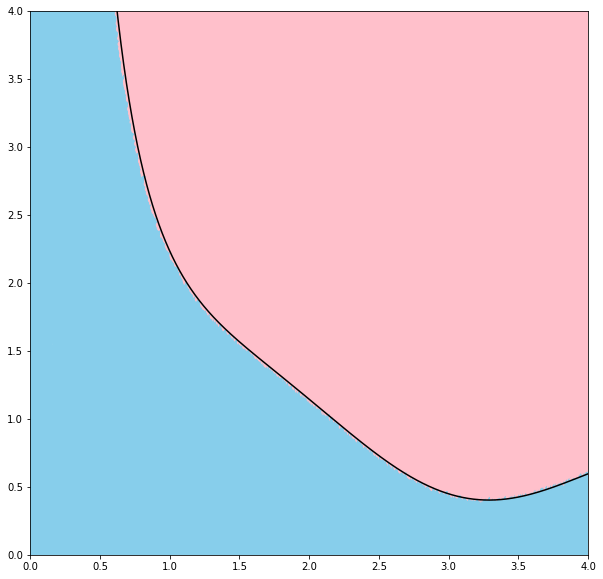

In [49]:
# 시각화를 위해 정렬
df = df.sort_values(by = ['x'])

plt.figure(figsize=(10, 10))

plt.plot(df['x'], df['fx'], color = 'black')
plt.scatter(df['x'], df['y'], c = df['color'])

plt.xlim(0, 4)
plt.ylim(0, 4)

- 난수가 100개, 1000개, 10000개일 때

(0.0, 4.0)

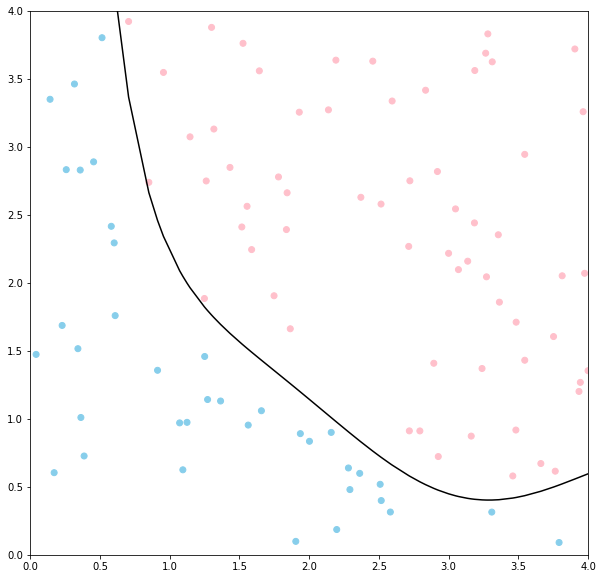

In [28]:
df = pd.DataFrame(np.random.rand(100, 2)*4, columns=['x', 'y'])
df['fx'] = df['x'].map(function_yd)
df['color'] = df['fx'] - df['y']
df['color'] = df['color'].map(color)

df = df.sort_values(by = ['x'])

plt.figure(figsize=(10, 10))

plt.plot(df['x'], df['fx'], color = 'black')
plt.scatter(df['x'], df['y'], c = df['color'])

plt.xlim(0, 4)
plt.ylim(0, 4)

(0.0, 4.0)

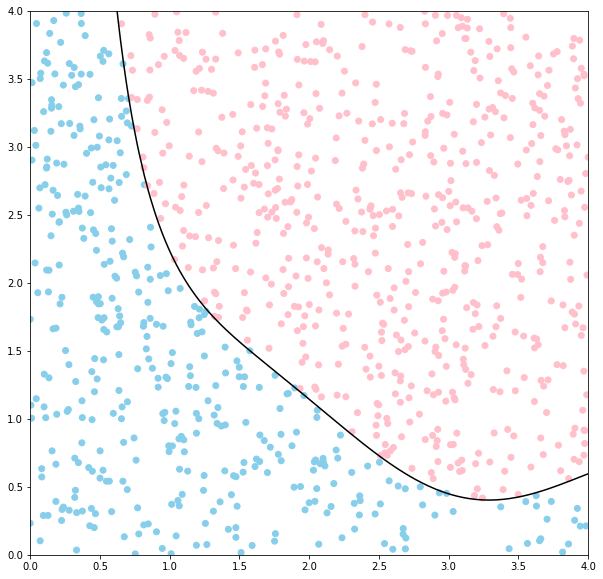

In [44]:
df = pd.DataFrame(np.random.rand(1000, 2)*4, columns=['x', 'y'])
df['fx'] = df['x'].map(function_yd)
df['color'] = df['fx'] - df['y']
df['color'] = df['color'].map(color)

df = df.sort_values(by = ['x'])

plt.figure(figsize=(10, 10))

plt.plot(df['x'], df['fx'], color = 'black')
plt.scatter(df['x'], df['y'], c = df['color'])

plt.xlim(0, 4)
plt.ylim(0, 4)

(0.0, 4.0)

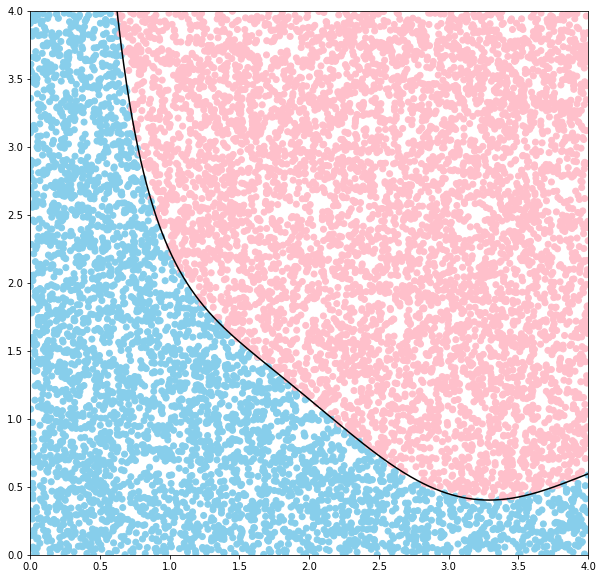

In [45]:
df = pd.DataFrame(np.random.rand(10000, 2)*4, columns=['x', 'y'])
df['fx'] = df['x'].map(function_yd)
df['color'] = df['fx'] - df['y']
df['color'] = df['color'].map(color)

df = df.sort_values(by = ['x'])

plt.figure(figsize=(10, 10))

plt.plot(df['x'], df['fx'], color = 'black')
plt.scatter(df['x'], df['y'], c = df['color'])

plt.xlim(0, 4)
plt.ylim(0, 4)